<a href="https://colab.research.google.com/github/jyotidabass/Gabor-feature-extraction-tongue-coated-non-coated/blob/main/Gabor_features_coated_tongue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [38]:
data = pd.read_csv ('/content/Extracted_Gabor_features.csv')

In [39]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
count,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,...,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,464.000000
mean,2.511906e+07,4.959446e+07,9.053014e+07,6.199385e+07,2.936899e+07,2.511906e+07,4.959446e+07,9.053014e+07,6.199385e+07,2.936899e+07,...,2.348367e+08,1.582986e+08,8.171060e+07,8.644726e+07,2.531084e+08,2.348362e+08,1.582986e+08,8.171056e+07,8.644725e+07,0.504310
std,4.702290e+07,7.746620e+07,1.161049e+08,8.839012e+07,5.313870e+07,4.702290e+07,7.746620e+07,1.161049e+08,8.839012e+07,5.313870e+07,...,2.938550e+08,2.060749e+08,1.063856e+08,1.125524e+08,3.167737e+08,2.938544e+08,2.060738e+08,1.063856e+08,1.125524e+08,0.500521
min,6.477500e+04,5.009860e+05,1.091876e+06,6.469430e+05,1.274000e+05,6.477500e+04,5.009860e+05,1.091876e+06,6.469430e+05,1.274000e+05,...,2.645470e+06,1.573811e+06,8.120670e+05,8.592330e+05,2.957625e+06,2.645217e+06,1.573829e+06,8.120320e+05,8.590620e+05,0.000000
25%,3.291926e+06,9.406018e+06,2.143370e+07,1.260361e+07,4.023322e+06,3.291926e+06,9.406018e+06,2.143370e+07,1.260361e+07,4.023322e+06,...,5.741397e+07,3.572282e+07,1.843336e+07,1.950193e+07,6.292513e+07,5.741406e+07,3.572283e+07,1.843380e+07,1.950178e+07,0.000000
50%,1.063016e+07,2.400969e+07,5.072083e+07,3.181759e+07,1.252580e+07,1.063016e+07,2.400969e+07,5.072083e+07,3.181759e+07,1.252580e+07,...,1.353459e+08,9.103637e+07,4.697276e+07,4.969579e+07,1.457925e+08,1.353478e+08,9.103622e+07,4.697270e+07,4.969575e+07,1.000000
75%,2.598324e+07,5.582603e+07,1.122424e+08,7.202788e+07,2.962484e+07,2.598324e+07,5.582603e+07,1.122424e+08,7.202788e+07,2.962484e+07,...,2.928153e+08,1.894549e+08,9.777369e+07,1.034424e+08,3.199720e+08,2.928158e+08,1.894561e+08,9.777400e+07,1.034429e+08,1.000000
max,4.090433e+08,6.304719e+08,7.954644e+08,6.388644e+08,4.626745e+08,4.090433e+08,6.304719e+08,7.954644e+08,6.388644e+08,4.626745e+08,...,2.466931e+09,1.747812e+09,9.019449e+08,9.542327e+08,2.593724e+09,2.466930e+09,1.747802e+09,9.019450e+08,9.542332e+08,1.000000


In [40]:
X , Y = data.values [ : , : -1 ] , data.values [ : , -1 ] 

In [41]:
print ( "classes are : " , np.unique ( Y ) )  

classes are :  [0 1]


In [42]:
X.shape

(464, 50)

In [43]:
Y.shape

(464,)

SPLIT_TRAIN_TEST

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y , test_size = 0.3 , random_state = 7)

TRAIN

In [51]:
from sklearn.svm import SVC
from sklearn import svm
model = RandomForestClassifier( n_estimators=100 , random_state = 7 )
model=svm.SVC(gamma='scale')

In [61]:
model.fit(X_train,Y_train)
#cm = confusion_matrix(Y_test,cf.predict(X_test))
#sns.heatmap(cm,annot=True,fmt="d")

SVC()

In [55]:
print ("baseline accuracy " , (  (model.predict(X_test) == Y_test).astype("int8").sum() / Y_test.shape[0]   ) )

baseline accuracy  0.5928571428571429


In [72]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
a=confusion_matrix(Y_test,y_pred)
#a[0][0]=54; a[0][1]=11; a[1][0]=46; a[1][1]=29;

In [73]:
print("Sensitivity:",a[0][0]/(a[0][0]+a[0][1]))

Sensitivity: 0.8307692307692308


In [74]:
print("Specificty:", a[1][1]/(a[1][1]+a[1][0]))

Specificty: 0.38666666666666666


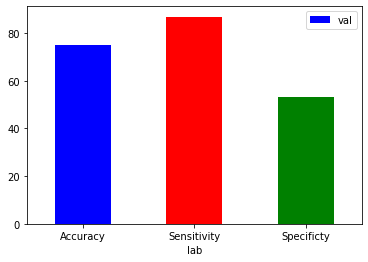

In [75]:
df = pd.DataFrame({'lab':['Accuracy', 'Sensitivity', 'Specificty'], 'val':[75,86.9,53.1]}) #RF
ax = df.plot.bar(x='lab', y='val', rot=0,color=['b', 'r', 'g'])